# Iterative Methods
## Jacobi

Simultaneously solve each row of the matrix using current solution values from current iterate:

$u^{(k+1)}_i = \frac{1}{a_{i,i}} (f_i - \sum_{j\neq i} a_{i,j}u^{(k)}_j)$
 
$\mathbf{u} \leftarrow D^{-1}(\mathbf{f} + (L+U)\mathbf{u})$

In [1]:
# Import some python libraries we need
import numpy as np
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
import matplotlib.pyplot as plt

# Define the size of the problem and construct the matrix
n = 64
A = sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n,n), format='csr')

# Define a solution and corresponding right-hand side
# u_final = np.random.rand(n)
# f = A*u_final

# Define a right-hand side and corresponding solution
# f = np.ones(n)
# u_final = sla.spsolve(A,f)

# Define a zero right-hand side and random initial guess
f = np.zeros(n)
u_final = np.zeros(n)
u = np.random.rand(n)

# Set the initial guess and make a copy
# u = np.zeros((n,))
u_next = u.copy()
i = 0

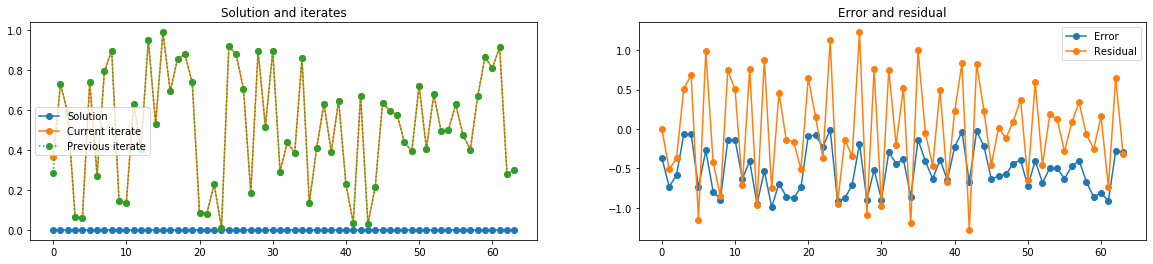

In [2]:
# Visualize Jacobi, step by step

# Initialize to the right-hand side
u_next[i] = f[i]

# Subtract off (L+U)u
for j in range(A.indptr[i],A.indptr[i+1]):
    if A.indices[j] == i:
        diag = A.data[j]
    else:
        u_next[i] = u_next[i] - A.data[j]*u[A.indices[j]]

# Divide by the diagonal        
u_next[i] = u_next[i]/diag
        
# Go to the next degree of freedom
if i == n-1:
    i = 0
    u = u_next.copy()
else:
    i = (i + 1)
    
# Plot progress toward solution
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title('Solution and iterates')
plt.plot(u_final,'-o')
plt.plot(u_next,'-o')
plt.plot(u,':o')
plt.legend(['Solution','Current iterate','Previous iterate'])

# Plot error
plt.subplot(1,2,2)
plt.title('Error and residual')
plt.plot(u_final - u_next,'-o')
plt.plot(A*(u_final - u_next),'-o')
plt.legend(['Error','Residual'])
plt.show()

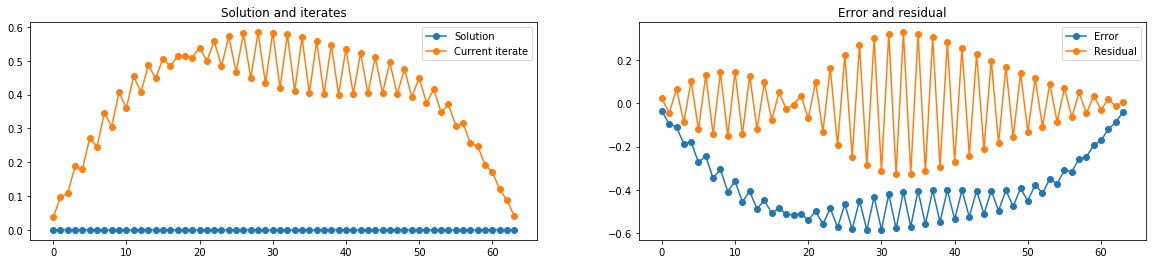

In [3]:
# Visualize Jacobi, iteration by iteration
numIterations = 100
for k in range(numIterations):
    for i in range(n):
        # Initialize to the right-hand side
        u_next[i] = f[i]

        # Subtract off (L+U)u
        for j in range(A.indptr[i],A.indptr[i+1]):
            if A.indices[j] == i:
                diag = A.data[j]
            else:
                u_next[i] = u_next[i] - A.data[j]*u[A.indices[j]]

        # Divide by the diagonal        
        u_next[i] = u_next[i]/diag

    # Update iterate
    u = u_next.copy()
    
# Plot progress toward solution
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title('Solution and iterates')
plt.plot(u_final,'-o')
plt.plot(u,'-o')
plt.legend(['Solution','Current iterate'])

# Plot error
plt.subplot(1,2,2)
plt.title('Error and residual')
plt.plot(u_final - u,'-o')
plt.plot(A*(u_final - u),'-o')
plt.legend(['Error','Residual'])
plt.show()

## Gauss-Seidel

Simultaneously solve each row of the matrix using current solution values from current iterate:

$u_i \leftarrow \frac{1}{a_{i,i}} (f_i - \sum_{j\neq i} a_{i,j}u_j)$
 
$\mathbf{u} \leftarrow (D-L)^{-1}(\mathbf{f} + U\mathbf{u})$

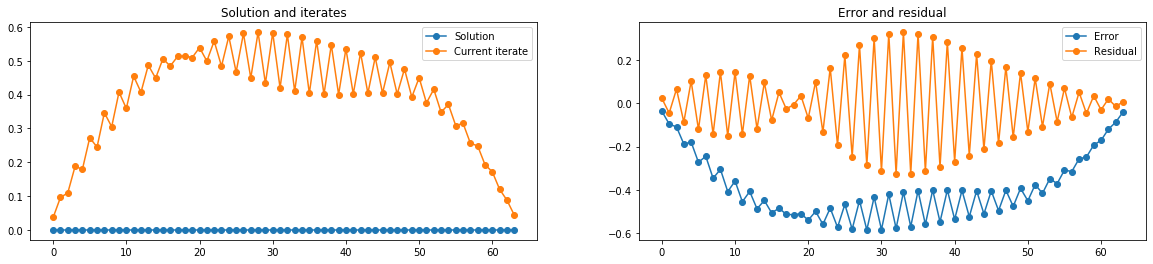

In [4]:
# Visualize Gauss-Seidel, step by step

# Initialize to the right-hand side
u[i] = f[i]

# Subtract off (L+U)u, where u has some updated values
for j in range(A.indptr[i],A.indptr[i+1]):
    if A.indices[j] == i:
        diag = A.data[j]
    else:
        u[i] = u[i] - A.data[j]*u[A.indices[j]]

# Divide by the diagonal        
u[i] = u[i]/diag
        
# Go to the next degree of freedom
i = (i + 1) % n
    
# Plot progress toward solution
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title('Solution and iterates')
plt.plot(u_final,'-o')
plt.plot(u,'-o')
plt.legend(['Solution','Current iterate'])

# Plot error
plt.subplot(1,2,2)
plt.title('Error and residual')
plt.plot(u_final - u_next,'-o')
plt.plot(A*(u_final - u_next),'-o')
plt.legend(['Error','Residual'])
plt.show()

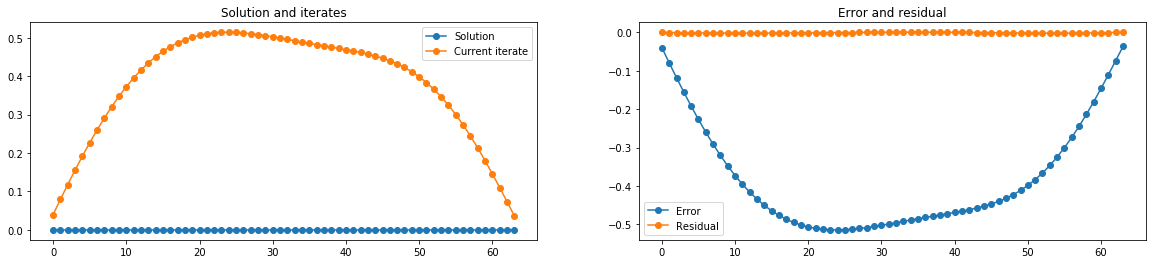

In [5]:
# Visualize Jacobi, iteration by iteration
numIterations = 10
for k in range(numIterations):
    for i in range(n):
        # Initialize to the right-hand side
        u[i] = f[i]

        # Subtract off (L+U)u
        for j in range(A.indptr[i],A.indptr[i+1]):
            if A.indices[j] == i:
                diag = A.data[j]
            else:
                u[i] = u[i] - A.data[j]*u[A.indices[j]]

        # Divide by the diagonal        
        u[i] = u[i]/diag
    
# Plot progress toward solution
plt.subplots(figsize=(20, 4))
plt.subplot(1,2,1)
plt.title('Solution and iterates')
plt.plot(u_final,'-o')
plt.plot(u,'-o')
plt.legend(['Solution','Current iterate'])

# Plot error
plt.subplot(1,2,2)
plt.title('Error and residual')
plt.plot(u_final - u,'-o')
plt.plot(A*(u_final - u),'-o')
plt.legend(['Error','Residual'])
plt.show()